# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies
import requests
import json
from citipy import citipy
from datetime import date
import random
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import linregress
from api_keys import weather_api_key

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
print(weather_api_key)

68970bdad69e00449a9f178cc072f6f2


## Generate Cities List

In [4]:
#List Generation
cities = []
state_list = []
lat_list = []
lon_list = []
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

In [5]:
data_dict = {
    "City": cities,
    "Country Code": state_list,
    "Latitude (N+/S-)": lat_list,
    "Longitude (E+/W-)": lon_list,
    "Temperature (F)": temp_list,
    "Humidity (%)": humid_list,
    "Cloudiness (%)": cloud_list,
    "Wind Speed (mph)": wind_list
}

In [6]:
def WeatherDataPull(pull_number):
    print("Begining Data Collection")
    print("-----------------------------------------")
    # First Break Condition, limits list size to intended 500 cities
    while len(cities) < pull_number:
        # Restart loop condition to pull new city without appending the duplicate
        restart=True
        while restart:
            restart=False
            #Lat/Long and city name pull
            lat = random.uniform(-90, 90)
            lon = random.uniform(-180, 180)
            cityget = citipy.nearest_city(lat, lon)
            city = str(cityget.city_name)
            state = str(cityget.country_code)
            if city in cities:
                #Duplicate check, if already found, will loop back to top and pull new city without adding to lists
                #print("Duplicate City Found")
                restart=True
            else:
                #URL for call
                call_url = url + "q=" + city + "," + state + "&units=imperial&appid=" + weather_api_key
                try:
                    #Attempts the API Pull, if KeyError at the first list append due to bad city, will not append to lists and will skip                           with error message that the city failed to register a data pull
                    city_data = requests.get(call_url).json()
                    lat_list.append(city_data['coord']['lat'])
                    lon_list.append(city_data['coord']['lon'])
                    temp_list.append(city_data['main']['temp'])
                    humid_list.append(city_data['main']['humidity'])
                    cloud_list.append(city_data['clouds']['all'])
                    wind_list.append(city_data['wind']['speed'])
                    cities.append(city)
                    state_list.append(state)
                    city_length = len(cities)
                    print(f"Processing weather data for {city}, {state} | City number {city_length}")
                except KeyError:
                    #Key Error will catch and loop here before appending to any lists
                    #print(f"Failed to collect data for {city}, {state}, skipping city")
                    restart=True
                if len(cities) == pull_number:
                    #Second break conditon to hit limit
                    print("-----------------------------------------")
                    print(f"Weather Data collection complete with {(len(cities))} cities collected")
                    break

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
pull_number = int(input("How many cities would you like to pull data for?: "))
WeatherDataPull(pull_number)

beach, us | City number 163
Processing weather data for sitka, us | City number 164
Processing weather data for iqaluit, ca | City number 165
Processing weather data for mogadishu, so | City number 166
Processing weather data for mendi, pg | City number 167
Processing weather data for narsaq, gl | City number 168
Processing weather data for mitsamiouli, km | City number 169
Processing weather data for svetlaya, ru | City number 170
Processing weather data for aklavik, ca | City number 171
Processing weather data for san quintin, mx | City number 172
Processing weather data for kuopio, fi | City number 173
Processing weather data for ancud, cl | City number 174
Processing weather data for kilgore, us | City number 175
Processing weather data for antofagasta, cl | City number 176
Processing weather data for khasan, ru | City number 177
Processing weather data for goma, cd | City number 178
Processing weather data for onverwacht, sr | City number 179
Processing weather data for saint-augu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
weather_data = pd.DataFrame(data_dict)
weather_data.to_csv("Output/weather_data.csv", encoding="utf-8", index=True, header=True)

weather_data

,City,Country Code,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,clyde river,ca,70.47,-68.59,15.80,92,75,14.99
1,busselton,au,-33.65,115.33,57.79,78,100,4.07
2,broome,au,-17.97,122.23,75.20,88,40,3.36
3,ushuaia,ar,-54.80,-68.30,55.40,58,90,9.17
4,cape town,za,-33.93,18.42,60.57,59,0,14.99
...,...,...,...,...,...,...,...,...
495,shakawe,bw,-18.37,21.85,74.44,21,18,2.30
496,tlacotepec,mx,20.07,-97.87,65.05,69,67,5.46
497,peniche,pt,39.36,-9.38,63.37,87,93,5.10
498,dryden,ca,49.78,-92.75,35.60,74,90,24.16


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
try:
    weather_data = weather_data[weather_data['Humidity (%)'] <=100]
    print(f'Conducting quick quality check of the data')
    print(f'We now have {(len(weather_data))} cities to parse')
except KeyError:
    print("All cities within acceptable humidty levels")
    print(f'We still have {(len(weather_data))} cities to parse')

Conducting quick quality check of the data
We now have 500 cities to parse


In [46]:
weather_summary = weather_data.describe()

weather_summary

,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,17.624120,16.806260,58.422620,71.974000,48.774000,8.222340
std,34.222139,90.671743,23.149888,20.275491,38.972151,5.685718
min,-54.800000,-179.170000,-11.600000,13.000000,0.000000,0.180000
25%,-10.742500,-63.112500,43.142500,60.750000,2.750000,4.245000
50%,18.990000,23.090000,64.990000,77.000000,43.000000,6.930000
75%,48.165000,93.685000,77.055000,88.000000,90.000000,11.180000
max,78.220000,178.420000,98.600000,100.000000,100.000000,32.210000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
weather_output_file = "Output/weather_data.csv"

weather_csv = pd.read_csv(weather_output_file)

weather_csv

,Unnamed: 0,City,Country Code,Latitude (N+/S-),Longitude (E+/W-),Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,0,clyde river,ca,70.47,-68.59,15.80,92,75,14.99
1,1,busselton,au,-33.65,115.33,57.79,78,100,4.07
2,2,broome,au,-17.97,122.23,75.20,88,40,3.36
3,3,ushuaia,ar,-54.80,-68.30,55.40,58,90,9.17
4,4,cape town,za,-33.93,18.42,60.57,59,0,14.99
...,...,...,...,...,...,...,...,...,...
495,495,shakawe,bw,-18.37,21.85,74.44,21,18,2.30
496,496,tlacotepec,mx,20.07,-97.87,65.05,69,67,5.46
497,497,peniche,pt,39.36,-9.38,63.37,87,93,5.10
498,498,dryden,ca,49.78,-92.75,35.60,74,90,24.16


In [12]:
try:
    weather_csv = weather_csv[weather_csv['Humidity (%)'] <=100]
    print(f"Some Cities were above 100% humidity")
    print(f'We now have {(len(weather_csv))} cities to parse')
except KeyError:
    print("All cities within acceptable humidty levels")
    print(f'We still have {(len(weather_csv))} cities to parse')

Some Cities were above 100% humidity
We now have 500 cities to parse


In [13]:
time = date.today()

In [14]:
## Latitude vs. Temperature Plot

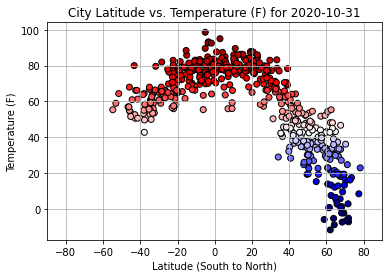

In [15]:
city_lat = weather_csv['Latitude (N+/S-)']
temp = weather_csv['Temperature (F)']

plt.scatter(city_lat, temp, c=temp, cmap="seismic", marker='o', facecolors='red', edgecolors='black')
plt.xlim(-90, 90)
plt.title(f"City Latitude vs. Temperature (F) for {time}")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Temperature (F)")
plt.grid()
plt.show

plt.savefig("Output/Saved Plots/Lat vs Temp.png")

In [16]:
### Shows relation between Latitude and local temperature at said latitude.  You can clearly see the relation between general temp ranges depending on your place on the globe.  

## Latitude vs. Humidity Plot

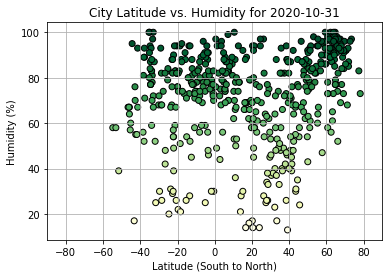

In [17]:
humidity = weather_csv['Humidity (%)']

plt.scatter(city_lat, humidity, c=humidity, cmap='YlGn', marker='o', facecolors='red', edgecolors='black')
plt.title(f"City Latitude vs. Humidity for {time}")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.grid()
plt.show

plt.savefig("Output/Saved Plots/Lat vs Humidity.png")

In [18]:
### Shows the relation between Latitide and local humidty percentage.  We can see there is much less relevence to a city's latitude and its humidity levels.  

## Latitude vs. Cloudiness Plot

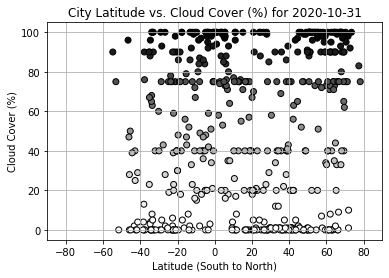

In [19]:
cloud_cover = weather_csv['Cloudiness (%)']

plt.scatter(city_lat, cloud_cover, c=cloud_cover, cmap='Greys', marker='o', facecolors='grey', edgecolors='black')
plt.title(f"City Latitude vs. Cloud Cover (%) for {time}")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Cloud Cover (%)")
plt.xlim(-90, 90)
plt.grid()
plt.show

plt.savefig("Output/Saved Plots/Lat vs Clouds.png")

In [20]:
### Shows the relationship between latitude and current cloud coverage percentage at a given location.  Similar to humidity, there is very litle shown correlation between cloud coverage and a city's position

## Latitude vs. Wind Speed Plot

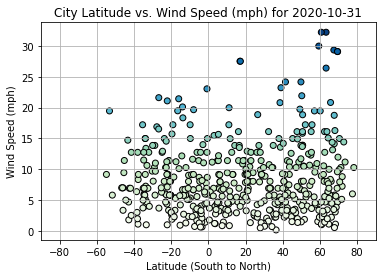

In [21]:
wind = weather_csv['Wind Speed (mph)']

plt.scatter(city_lat, wind, c=wind, cmap='GnBu', marker='o', facecolors='grey', edgecolors='black')
plt.title(f"City Latitude vs. Wind Speed (mph) for {time}")
plt.xlabel("Latitude (South to North)")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.grid()
plt.plot

plt.savefig("Output/Saved Plots/Lat vs Wind.png")

In [22]:
### Shows the relationship between a city's latitude and its current wind speed.  Wind speed generally sits at lower speeds with some extreemes, perhaps someone could argue more extreme weind speeds closer to the poles, yet there is no clear trend to give that conlcusion based on this chart alone.

## Linear Regression

In [23]:
north_hemi = weather_csv.loc[weather_csv['Latitude (N+/S-)'] >= 0]

In [24]:
south_hemi = weather_csv.loc[weather_csv['Latitude (N+/S-)'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7659067590542586


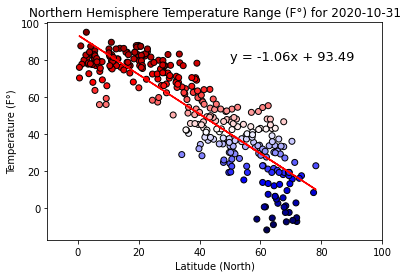

In [25]:
north_lat = north_hemi['Latitude (N+/S-)']
north_temp = north_hemi['Temperature (F)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
north_temp_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_temp, c=north_temp, cmap="seismic", marker='o', facecolors='red', edgecolors='black')
plt.xlim(-10, 100)
plt.title(f"Northern Hemisphere Temperature Range (F°) for {time}")
plt.xlabel("Latitude (North)")
plt.ylabel("Temperature (F°)")

plt.plot(north_lat, north_temp_regress_values, "r-")
plt.annotate(line_eq, (50, 80), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Temp Regression.png")

In [26]:
### This regression and r-squared value show a strong relationship between the temp and how close or far the city is from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5072692736654101


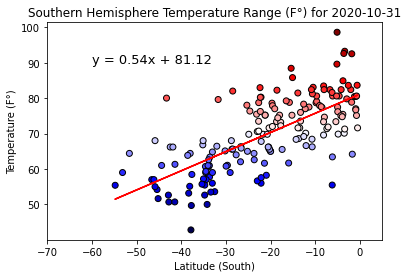

In [27]:
south_lat = south_hemi['Latitude (N+/S-)']
south_temp = south_hemi['Temperature (F)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
south_temp_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_temp, c=south_temp, cmap="seismic", marker='o', facecolors='red', edgecolors='black')
plt.xlim(-70, 5)
plt.title(f"Southern Hemisphere Temperature Range (F°) for {time}")
plt.xlabel("Latitude (South)")
plt.ylabel("Temperature (F°)")

plt.plot(south_lat, south_temp_regress_values, "r-")
plt.annotate(line_eq, (-60, 90), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Temp Regression.png")

In [28]:
### This chart is more interesting, as in the southern hemisphere there is significantly less correlation between temp and latitude as compared to the northern hemisphere.  It could be down to a smaller sample size due to a majority of earth's land mass sitting in the northern hemisphere.  It could also be down to other scientific answers that cant be demonstrated in this chart.  An interesting comparason between the two hemispheres regardless

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08901117102630601


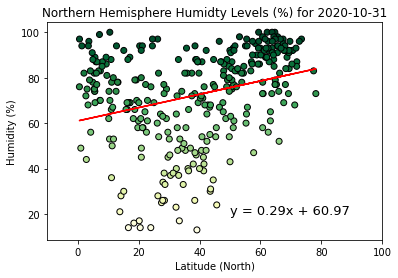

In [29]:
north_lat = north_hemi['Latitude (N+/S-)']
north_humid = north_hemi['Humidity (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
north_humid_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_humid, c=north_humid, cmap="YlGn", marker='o', edgecolors='black')
plt.xlim(-10, 100)
plt.title(f"Northern Hemisphere Humidty Levels (%) for {time}")
plt.xlabel("Latitude (North)")
plt.ylabel("Humidity (%)")

plt.plot(north_lat, north_humid_regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Humidity Regression.png")

In [30]:
### This chart backs up the early analysis based on the correlation between humidty and latitude.  The r-squared value is too close to zero to confidetly say there is any real correlation.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.004700957621379153


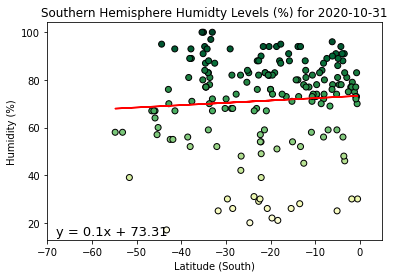

In [31]:
south_lat = south_hemi['Latitude (N+/S-)']
south_humid = south_hemi['Humidity (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
south_humid_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_humid, c=south_humid, cmap="YlGn", marker='o', edgecolors='black')
plt.xlim(-70, 5)
plt.title(f"Southern Hemisphere Humidty Levels (%) for {time}")
plt.xlabel("Latitude (South)")
plt.ylabel("Humidity (%)")

plt.plot(south_lat, south_humid_regress_values, "r-")
plt.annotate(line_eq, (-68, 15), fontsize=13, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Humidity Regression.png")

In [32]:
### This chart show how much less correlated humidty levels are in the southern half than the northern half of the globe.  Near 0 levels of correlation demonstrate how un-correlated humidity is to your global position generally.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01127308546246721


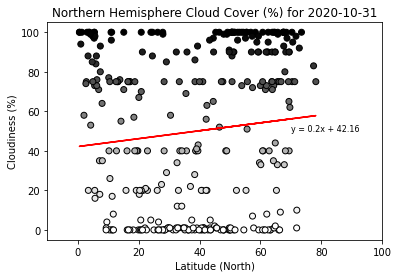

In [33]:
north_lat = north_hemi['Latitude (N+/S-)']
north_cloud = north_hemi['Cloudiness (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
north_cloud_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_cloud, c=north_cloud, cmap='Greys', marker='o', edgecolors='black')
plt.xlim(-10, 100)
plt.title(f"Northern Hemisphere Cloud Cover (%) for {time}")
plt.xlabel("Latitude (North)")
plt.ylabel("Cloudiness (%)")

plt.plot(north_lat, north_cloud_regress_values, "r-")
plt.annotate(line_eq, (70, 50), fontsize=8, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Cloud Cover Regression.png")

In [34]:
### This chart shows the lack of correlation between the two variables.   No real ability to predict the clouds based on latitude with this regression line equation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05833997573464944


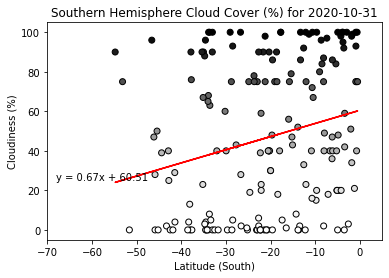

In [35]:
south_lat = south_hemi['Latitude (N+/S-)']
south_cloud = south_hemi['Cloudiness (%)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
south_cloud_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_cloud, c=south_cloud, cmap="Greys", marker='o', edgecolors='black')
plt.xlim(-70, 5)
plt.title(f"Southern Hemisphere Cloud Cover (%) for {time}")
plt.xlabel("Latitude (South)")
plt.ylabel("Cloudiness (%)")

plt.plot(south_lat, south_cloud_regress_values, "r-")
plt.annotate(line_eq, (-68, 25), fontsize=10, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Cloud Cover Regression.png")

In [36]:
### This chart again shows the lack of correlation between the two variables.  No real ability to predict the clouds based on latitude with this regression line equation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.020626683329871436


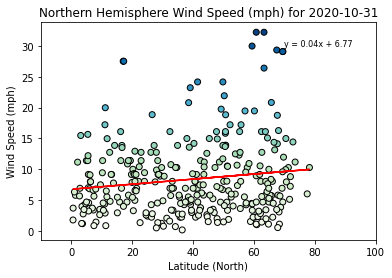

In [37]:
north_lat = north_hemi['Latitude (N+/S-)']
north_wind = north_hemi['Wind Speed (mph)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
north_wind_regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(north_lat, north_wind, c=north_wind, cmap='GnBu', marker='o', edgecolors='black')
plt.xlim(-10, 100)
plt.title(f"Northern Hemisphere Wind Speed (mph) for {time}")
plt.xlabel("Latitude (North)")
plt.ylabel("Wind Speed (mph)")

plt.plot(north_lat, north_wind_regress_values, "r-")
plt.annotate(line_eq, (70, 30), fontsize=8, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Northern-Hemi v Wind Speed Regression.png")

In [38]:
### This chart again shows the lack of correlation between the two variables.  No real ability to predict the wind speeds based on latitude with this regression line equation.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00907892375371452


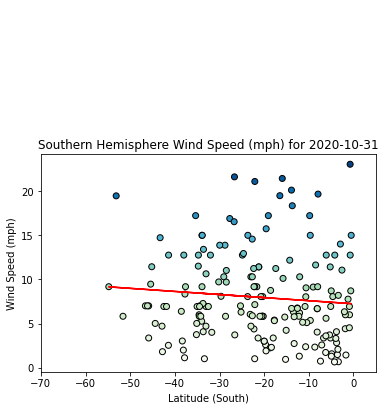

In [39]:
south_lat = south_hemi['Latitude (N+/S-)']
south_wind = south_hemi['Wind Speed (mph)']

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
south_wind_regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Setup
plt.scatter(south_lat, south_wind, c=south_wind, cmap="GnBu", marker='o', edgecolors='black')
plt.xlim(-70, 5)
plt.title(f"Southern Hemisphere Wind Speed (mph) for {time}")
plt.xlabel("Latitude (South)")
plt.ylabel("Wind Speed (mph)")

plt.plot(south_lat, south_wind_regress_values, "r-")
plt.annotate(line_eq, (-20, 40), fontsize=10, color='black')

plt.show
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Output/Saved Plots/Southern-Hemi v Wind Speed Regression.png")

In [40]:
### This chart again shows the lack of correlation between the two variables.  No real ability to predict wind speeds based on latitude with this regression line equation.

## Analysis

In [41]:
# 1.    The first major trend we can see if the disparity between the northern and southern hemispheres.  While the northern hemisphere has a much stronger correlation based on latitude, you can predict with much more confidence that the further your travel from the equator, the colder the temperature will be.  In the southern hemisphere, that same data is much less correlated.  What we can’t tell from only this data is why this is.  Could it come down to the lack of land in the southern hemisphere compared to the northern?  Could it come down to other geological phenomena or circumstances?  This trend, while not answering a specific question, open the door to many more questions to look into for answers

#2.     Another trend we see is humidity and its lack of correlation at any latitude.  The data shows a near zero correlation for both hemispheres when it comes to humidity levels at certain latitudes.  While some might expect there to be at least some elements of higher humidity levels near the equator, it seems that latitude has no influence on a locations humidity at any given day baring extenuating circumstances. 

#3.	    One trend that I do not have a solid answer for is the clump of high humidity levels at latitudes around 60 degrees north.  While the correlation and linear regression models show almost no correlation to each other, It seems almost all cities with a latitude over 60 degrees north has high humidity levels.  Its something to look more into, as the data we have cant truly answer why they are there, but must be investigated into more.
